In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline


from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from Ipython.core.pylabtools import figsize
# from pandas.plotting import register_maplotlib_converters 

In [ ]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 2X')
dataset= df.copy()

In [ ]:


def standardizme(dataset, outname):
    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset)
    data1_Sd= Sd_scaler1.transform(dataset)
    print(data1_Sd)
    
    #convert to dataframe
    outname= pd.DataFrame(data1_Sd, columns=dataset.keys())

    return outname

standardizme(dataset,dataset)


# using minmax
# places each feature between 1 and 0
from sklearn.preprocessing import MinMaxScaler

scaler2=MinMaxScaler()
MM_scaler1=scaler2.fit(dataset1)
data1_MM=MM_scaler1.transform(dataset1)
print(data1_MM)

In [28]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 4X')
dataset= df.copy()





from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler(feature_range = (0, 1))
MM_scaler1=scaler2.fit(dataset)
data1_MM=MM_scaler1.transform(dataset)

#     print(data1_MM)
    
#     convert to dataframe
outname= pd.DataFrame(data1_MM, columns=dataset.keys())

dataset_sd= data1_MM
#     return dataset_sd

# standardizme(dataset)


# split datat into input and target

inputs = dataset_sd.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7, random_state=None, shuffle=False,)

print('train samples:', len(train_input))
print('test samples', len(test_input))


AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [25]:
# train_input.shape
dataset
# test_target

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,1397.8128,22.583600,48.69380,4.8681,0.1085,1.3742,1.3348,0.3199,0.5203,1.840900,2.5852,-90.1580
1,1397.9652,22.620200,50.56180,1.6163,0.1065,1.3631,1.2810,0.3188,0.5367,1.831100,1.3248,-97.6912
2,1398.1176,22.656800,53.31300,2.0106,0.1045,1.3652,1.2272,0.3178,0.5531,1.821300,1.5789,-102.8984
3,1398.2700,22.693400,55.10940,2.9638,0.1025,1.3925,1.1734,0.3188,0.5530,1.811500,2.4775,-110.9431
4,1398.4224,22.730000,54.88730,3.5034,0.1027,1.3968,1.1196,0.3179,0.5423,1.801700,3.3761,-114.2520
...,...,...,...,...,...,...,...,...,...,...,...,...
4202,2038.1976,13.346050,42.81705,2.1493,0.0860,2.4922,2.5933,1.5312,0.2901,2.292933,2.3165,-37.2460
4203,2038.3500,13.345175,43.00350,2.1972,0.0865,2.1937,2.2315,1.5235,0.2863,2.289700,2.2338,-36.8327
4204,2038.5024,13.344300,43.18995,2.2765,0.0869,2.0966,1.9364,1.5158,0.2825,2.303800,2.1731,-36.7469
4205,2038.6548,13.343700,43.37640,2.3558,0.0872,1.9995,1.9078,1.5081,0.2787,2.317300,2.1331,-36.8805


# 2.5 Data transformation

It is important to ensure that the scale of the output is in the range 0–1 to match the scale of the activation function (tanh) on the output layer of LSTM, GRU and BiLSTM. Also, input variables are better to be small values, probably in the range of 0–1.


* Fit the scaler (MinMaxScaler) using available training data (It means that the minimum and maximum observable values are estimated using training data.)

* Apply the scaler to training data

*Apply the scaler to test data

It is important to note that we should scale the unseen data with the scaler fitted on the training data.

In [ ]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [ ]:
# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))

In [14]:
range(60, 2035)

range(60, 2035)

In [16]:
# Creating Data with Timesteps
# len(X)-time_steps
# i:i+time_steps, :
X_train = []
y_train = []
time_steps=60
for i in range(len(train_input)-time_steps):
    X_train.append(train_input[i-60:i, 0])
    y_train.append(train_target[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

TypeError: '(slice(-60, 0, None), 0)' is an invalid key

In [8]:
# Building the LSTM

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


ValueError: in user code:

    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [32, 11]


In [ ]:
predicted_stock_price = regressor.predict(test_input)

In [ ]:
predicted = regressor.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')


In [ ]:
print("r2 score: {}".format(metrics.r2_score( test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error( test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

2.6 Create a 3D input dataset
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). So, I create a helper function, create_dataset, to reshape input.
In this project, I define time_steps = 30. It means that the model makes predictions based on the last 30-day data (In the first iteration of the for-loop, the input carries the first 30 days and the output is UWC on the 30th day).

In [ ]:

# train_input, test_input, train_target, test_target
len(train_input)

In [12]:
# Create a 3D input
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
#     return np.array(Xs), np.array(ys)
    return Xs, ys


TIME_STEPS = 1
X_test, y_test = create_dataset(test_input, test_target,   
#                                 TIME_STEPS
                               )
X_train, y_train = create_dataset(train_input, train_target, 
#                                   TIME_STEPS
                                 )
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

TypeError: '(slice(0, 1, None), slice(None, None, None))' is an invalid key

Step 3: Create BiLSTM, LSTM and GRU models

3.1 BiLSTM, LSTM and GRU models in TensorFlow

The first function, create_model_bilstm, creates a BDLSM and gets the number of units (neurons) in hidden layers. The second function, create_model, gets two inputs; number of units in hidden layers and model name (LSTM or GRU).
For the sake of simplicity, BiLSTM, LSTM and GRU have 64 neurons in the input layer, one hidden layer including 64 neurons and 1 neuron in the output layer.
To make the LSTM and GRU model robust to changes, the Dropout function is used. Dropout(0.2) randomly drops 20% of units from the network.

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# BiLSTM
model_bilstm = create_model_bilstm(64)
# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

3.2 Fit the models

I train the model with train data for 100 epoch and batch_size = 32. I get the model to use 20% of train data as validation data. I set shuffle = False because it gives a better performance.
To avoid overfitting, I set an early stop to stop training when validation loss has not improved after 10 epochs (patience = 10).

In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Plot train loss and validation loss
In this plot, I am going to see the number of epochs in each model and evaluate the model performance in prediction

In [ ]:
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

3.3 Inverse transform the target variable
After building the model, I have to transform the target variable back to original data space for train and test data using scaler_y.inverse_transform.

In [ ]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

3.4 Make prediction using BiLSTM, LSTM and GRU
Here I predict UWC using BiLSTM, LSTM and GRU models. Then, I plot true future (test data) vs prediction the three models.

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)
# Plot true future vs prediction
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
plot_future(prediction_bilstm, y_test)
plot_future(prediction_lstm, y_test)
plot_future(prediction_gru, y_test)


3.5 Calculate RMSE and MAE
Let me use two goodness-of-fit measure to evaluate the performance of the models.

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')


The goodness-of-fit of the three models shows that they have quite similar performance. Even so, the BiLSTM model has higher accuracy compared to LSTM and GRU. So I use the BiLSTM model for multi-step forecasting of UWC in the next 10 years.

⚠️ Note: The result of this project does not imply that BiLSTM has better results than LSTM and GRU. This is just an illustration of how you can compare these models to come up with the most reliable one for prediction.

In [ ]:
Step 4: Multi-step forecasting of water consumption in 10 years
I import climate data projections in the study site and filter them for the period of 2015–01–01 to 2025–01–01.


In [ ]:
# Plot histoy and future data
def plot_history_future(y_train, prediction):
    plt.figure(figsize=(10, 6))
    range_history = len(y_train)
    range_future = list(range(range_history, range_history +
                   len(prediction)))
    plt.plot(np.arange(range_history), np.array(y_train), 
             label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')
    plt.legend(loc='upper right')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
# Multi-step forecasting 
def forecast(X_input, time_steps):
    # Scale the unseen input with the scaler fitted on the train set
    X = input_scaler.transform(X_input)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
    X_transformed = np.array(Xs)
# Make prediction for unseen data using LSTM model
    prediction = model_bilstm.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual
prediction = forecast(X_new, TIME_STEPS)
plot_history_future(y_train, prediction)

In [3]:
xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df_r = pd.read_excel(xlsx, '1S 4X')
df= df_r.copy()

# 2.3 Split the dataset into train and test data
In this project, I set the first 80% of data as train data and the remaining 20% as test data. I train the model with train data and validate its performance with test data.

In [4]:
# Split train data and test data
train_size = int(len(df)*0.7)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

Dimension of train data:  (2944, 12)
Dimension of test data:  (1263, 12)


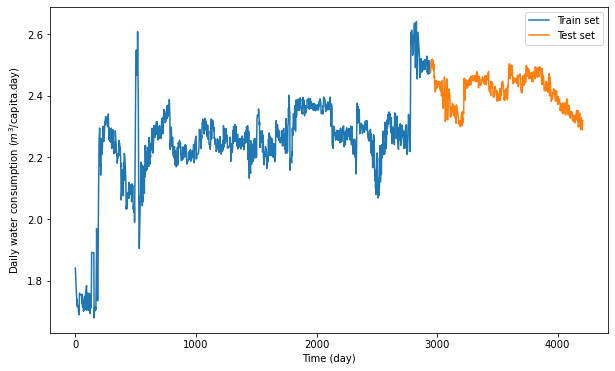

In [5]:
# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.RHOB)
plt.plot(test_dataset.RHOB)
plt.xlabel('Time (day)')
plt.ylabel('Daily water consumption ($m^3$/capita.day)')
plt.legend(['Train set', 'Test set'], loc='upper right')
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)


In [6]:
# Split the target variable and dependent variables
# Split train data to X and y
X_train = train_dataset.drop('RHOB', axis = 1)
y_train = train_dataset.loc[:,['RHOB']]

# Split test data to X and y
X_test = test_dataset.drop('RHOB', axis = 1)
y_test = test_dataset.loc[:,['RHOB']]

In [7]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

# Create a 3D input dataset
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). So, I create a helper function, create_dataset, to reshape input.

In [8]:
# Create a 3D input
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 50
X_test, y_test = create_dataset(test_x_norm, test_y_norm,   
                                TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, 
                                  TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (1213, 50, 11)
y_train.shape:  (2894, 1)
X_test.shape:  (1213, 50, 11)
y_test.shape:  (2894, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2],)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
91/91 [==============================] - 5s 54ms/step - loss: 0.0361
Epoch 2/100
91/91 [==============================] - 6s 69ms/step - loss: 0.0102
Epoch 3/100
91/91 [==============================] - 4s 49ms/step - loss: 0.0091
Epoch 4/100
91/91 [==============================] - 5s 58ms/step - loss: 0.0086
Epoch 5/100
91/91 [==============================] - 5s 55ms/step - loss: 0.0080
Epoch 6/100
91/91 [==============================] - 5s 52ms/step - loss: 0.0069
Epoch 7/100
91/91 [==============================] - 4s 48ms/step - loss: 0.0069: 1s - 
Epoch 8/100
91/91 [==============================] - 5s 50ms/step - loss: 0.0066
Epoch 9/100
91/91 [==============================] - 5s 53ms/step - loss: 0.0066
Epoch 10/100
91/91 [==============================] - 4s 49ms/step - loss: 0.0060
Epoch 11/100
91/91 [==============================] - 5s 58ms/step - loss: 0.0064
Epoch 12/100
91/91 [==============================] - 5s 50ms/step - loss: 0.0059
Epoch 13/100
91/91

Text(0, 0.5, 'Predicted')

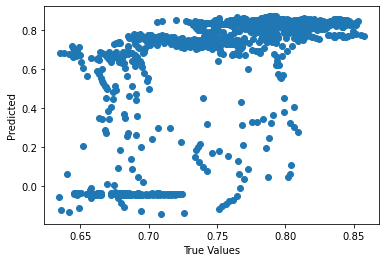

In [10]:
predicted = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')


In [11]:
print("r2 score: {}".format(metrics.r2_score( y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error( y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: -23.40229399421839
mse: 0.07031649413953402
rmse: 0.2651725742597338
mae: 0.13395329028880265
